In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import csv

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from threading import Timer
from timeit import default_timer as timer
from IPython.display import clear_output

In [3]:
start = timer()
prep_dataset1 = pd.read_csv('../datasets/dataset_test_02_07.csv', delimiter=",")
# prep_dataset2 = pd.read_csv('datasets/com_concept_drift/sdn_train_unormalized2.csv', delimiter=",")
# prep_dataset3 = pd.read_csv('datasets/com_concept_drift/sdn_train_unormalized3.csv', delimiter=",")
# prep_test = pd.read_csv('datasets/com_concept_drift/sdn_test_unormalized.csv', delimiter=",")

# prep_dataset1 = prep_dataset1[prep_dataset1.delay>0]
# prep_dataset2 = prep_dataset2[prep_dataset2.delay>0]
# prep_dataset3 = prep_dataset3[prep_dataset3.delay>0]
# prep_test = prep_test[prep_test.delay>0]
df = prep_dataset1.iloc[:,1:4]
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

In [4]:
df

,temperature,label,delay
0,19.3024,1,126.251634
1,19.1652,1,126.251634
2,19175.0000,1,126.251634
3,19.1456,1,126.251634
4,19.1652,1,126.251634
...,...,...,...
4895,19.5768,0,420.416429
4896,19.5866,0,420.416429
4897,19567.0000,0,420.416429
4898,19.5572,0,420.416429


In [5]:
train

,temperature,label,delay
0,19.3024,1,126.251634
1,19.1652,1,126.251634
2,19175.0000,1,126.251634
3,19.1456,1,126.251634
4,19.1652,1,126.251634
...,...,...,...
3425,22.6344,1,140.133064
3426,22.6442,1,140.133064
3427,22.7128,1,140.133064
3428,22.7324,1,140.133064


In [6]:
test

,temperature,label,delay
3430,22752.0000,1,140.125256
3431,22.7324,1,140.125256
3432,22752.0000,1,140.125256
3433,22.7912,1,140.125256
3434,22.7716,1,140.125256
...,...,...,...
4895,19.5768,0,420.416429
4896,19.5866,0,420.416429
4897,19567.0000,0,420.416429
4898,19.5572,0,420.416429


# Normalizing

In [7]:
def normalizing(df):
    f_columns = ['temperature']
    scaler1 = StandardScaler().fit(df)
    scaler2 = StandardScaler().fit(df)

    scaler1= scaler1.fit(df[f_columns].to_numpy())
    scaler2 = scaler2.fit(df[['delay']])

    df.loc[:,f_columns] = scaler1.transform(df[f_columns].to_numpy())
    df['delay'] = scaler2.transform(df[['delay']])
    return df


def unormalizing(df,Y_test,y_pred ):
    
    scaler = StandardScaler().fit(df)
    scaler = scaler.fit(df[['delay']])
    y_test_inv = scaler.inverse_transform(Y_test.reshape(1,-1))
    y_pred_inv = scaler.inverse_transform(y_pred)
    
    return y_test_inv, y_pred_inv


In [8]:
def saveFile(dataset, name='dataset'):
    print('saving: ',name, '......')
    f = open(name,'w')
    try:
        writer = csv.writer(f)
        writer.writerow(dataset.columns)
        for i in np.arange(int(dataset.shape[0])):
            writer.writerow(dataset.iloc[i,])
    finally:
        f.close()
        

def preprocessing(dataset, order): 
    print(dataset)
    saveFile(dataset, 'datasets/mininet/sdn_train_mininet_unormalized_'+str(order)+'.csv')
    norm = normalizing(dataset)
    saveFile(norm, 'datasets/mininet/sdn_train_mininet_normalized_'+str(order)+'.csv')

    return norm
    

In [9]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []    
    for i in range(len(X) - time_steps):
        clear_output(wait=True)
        print('modeling to keras ',round((i/(len(X) - time_steps))*100,2), ('%'), end='')
        s = round(timer() - start)
        if(s>60):
            s /=60
            print(' ', s, ' seconds')
        v = X.iloc[i: (i+time_steps), 1:3].to_numpy()
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

In [10]:
preprocessing(train, 'train')
preprocessing(test,'test')

      temperature  label       delay
0         19.3024      1  126.251634
1         19.1652      1  126.251634
2      19175.0000      1  126.251634
3         19.1456      1  126.251634
4         19.1652      1  126.251634
...           ...    ...         ...
3425      22.6344      1  140.133064
3426      22.6442      1  140.133064
3427      22.7128      1  140.133064
3428      22.7324      1  140.133064
3429      22.7618      1  140.133064

[3430 rows x 3 columns]
saving:  datasets/mininet/sdn_train_mininet_unormalized_train.csv ......


C:\Users\silva\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-7-90b713e14068>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delay'] = scaler2.transform(df[['delay']])


saving:  datasets/mininet/sdn_train_mininet_normalized_train.csv ......
      temperature  label       delay
3430   22752.0000      1  140.125256
3431      22.7324      1  140.125256
3432   22752.0000      1  140.125256
3433      22.7912      1  140.125256
3434      22.7716      1  140.125256
...           ...    ...         ...
4895      19.5768      0  420.416429
4896      19.5866      0  420.416429
4897   19567.0000      0  420.416429
4898      19.5572      0  420.416429
4899      19.5572      0  420.416429

[1470 rows x 3 columns]
saving:  datasets/mininet/sdn_train_mininet_unormalized_test.csv ......


C:\Users\silva\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-7-90b713e14068>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delay'] = scaler2.transform(df[['delay']])


saving:  datasets/mininet/sdn_train_mininet_normalized_test.csv ......


,temperature,label,delay
3430,2.706406,1,-0.765642
3431,-0.399553,1,-0.765642
3432,2.706406,1,-0.765642
3433,-0.399545,1,-0.765642
3434,-0.399548,1,-0.765642
...,...,...,...
4895,-0.399984,0,0.697763
4896,-0.399983,0,0.697763
4897,2.271175,0,0.697763
4898,-0.399987,0,0.697763


In [11]:
def LSTMconf(X_train):
    print('Init config LSTM')
    model = keras.Sequential()
    model.add(
        keras.layers.Bidirectional(
            keras.layers.LSTM(
                 activation="relu",
                units=512,
                input_shape=(X_train.shape[1],X_train.shape[2])
            )
        ))
    model.add(keras.layers.Dense(units=512, activation="relu"))
    model.add(keras.layers.Dense(units=512, activation="relu"))
    model.add(keras.layers.Dense(units=512, activation="relu"))
    model.add(keras.layers.Dense(units=512, activation="relu"))
    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(units=1))
    
    loss ="mse"
    optim = tf.keras.optimizers.Adam(
    learning_rate=0.0001)
    metrics=["accuracy"]

    model.compile(loss=loss, optimizer=optim, 
#              metrics=metrics
             )
    return model
    

In [12]:
def LSTMfit(model,X_train,Y_train):
    print('Init Train')
    start = timer()
    history = model.fit(
        X_train, Y_train, 
        epochs=256, 
        batch_size= 128,
        validation_split=0.1,
        shuffle=False,
    #     callbacks=[tensorboard_callback]
    )
    return history


In [13]:

train = pd.read_csv('datasets/mininet/sdn_train_mininet_normalized_train.csv', delimiter=",")     
test = pd.read_csv('datasets/mininet/sdn_train_mininet_normalized_test.csv', delimiter=",")  
X_train,Y_train = create_dataset(train, train.delay)
model = LSTMconf(X_train)
history = LSTMfit(model,X_train, Y_train)

# r = Timer(1.0, preprocessing, (prep_dataset.iloc[cont:cont+window,:]))
# r.start()
# print(X_train)
    

modeling to keras  99.97 %Init config LSTM
Init Train
Epoch 1/256
25/25 [==============================] - 10s 84ms/step - loss: 0.9608 - val_loss: 1.3084
Epoch 2/256
25/25 [==============================] - 1s 58ms/step - loss: 0.8384 - val_loss: 0.8372
Epoch 3/256
25/25 [==============================] - 2s 65ms/step - loss: 0.5469 - val_loss: 0.2029
Epoch 4/256
25/25 [==============================] - 1s 50ms/step - loss: 0.0706 - val_loss: 0.1698
Epoch 5/256
25/25 [==============================] - 1s 55ms/step - loss: 0.1104 - val_loss: 0.0359
Epoch 6/256
25/25 [==============================] - 2s 64ms/step - loss: 0.1094 - val_loss: 0.0601
Epoch 7/256
25/25 [==============================] - 1s 58ms/step - loss: 0.0224 - val_loss: 0.0248
Epoch 8/256
25/25 [==============================] - 1s 57ms/step - loss: 0.0148 - val_loss: 0.0221
Epoch 9/256
25/25 [==============================] - 1s 59ms/step - loss: 0.0111 - val_loss: 0.0196
Epoch 10/256
25/25 [=========================

25/25 [==============================] - 1s 57ms/step - loss: 0.0166 - val_loss: 0.0364
Epoch 82/256
25/25 [==============================] - 1s 58ms/step - loss: 0.0203 - val_loss: 0.0197
Epoch 83/256
25/25 [==============================] - 2s 61ms/step - loss: 0.0161 - val_loss: 0.0307
Epoch 84/256
25/25 [==============================] - 2s 60ms/step - loss: 0.0193 - val_loss: 0.0355
Epoch 85/256
25/25 [==============================] - 1s 57ms/step - loss: 0.0199 - val_loss: 0.0198
Epoch 86/256
25/25 [==============================] - 1s 51ms/step - loss: 0.0199 - val_loss: 0.0272
Epoch 87/256
25/25 [==============================] - 1s 52ms/step - loss: 0.0180 - val_loss: 0.0195
Epoch 88/256
25/25 [==============================] - 2s 66ms/step - loss: 0.0205 - val_loss: 0.0451
Epoch 89/256
25/25 [==============================] - 1s 52ms/step - loss: 0.0206 - val_loss: 0.0287
Epoch 90/256
25/25 [==============================] - 1s 52ms/step - loss: 0.0198 - val_loss: 0.0204
Epo

25/25 [==============================] - 1s 53ms/step - loss: 0.0102 - val_loss: 0.0369
Epoch 162/256
25/25 [==============================] - 1s 54ms/step - loss: 0.0103 - val_loss: 0.0193
Epoch 163/256
25/25 [==============================] - 1s 56ms/step - loss: 0.0093 - val_loss: 0.0380
Epoch 164/256
25/25 [==============================] - 1s 56ms/step - loss: 0.0117 - val_loss: 0.0209
Epoch 165/256
25/25 [==============================] - 1s 60ms/step - loss: 0.0093 - val_loss: 0.0388
Epoch 166/256
25/25 [==============================] - 2s 71ms/step - loss: 0.0114 - val_loss: 0.0472
Epoch 167/256
25/25 [==============================] - 2s 78ms/step - loss: 0.0156 - val_loss: 0.0197
Epoch 168/256
25/25 [==============================] - 1s 54ms/step - loss: 0.0139 - val_loss: 0.0417
Epoch 169/256
25/25 [==============================] - 1s 58ms/step - loss: 0.0187 - val_loss: 0.0205
Epoch 170/256
25/25 [==============================] - 2s 66ms/step - loss: 0.0177 - val_loss: 0

25/25 [==============================] - 1s 52ms/step - loss: 0.0098 - val_loss: 0.0279
Epoch 242/256
25/25 [==============================] - 1s 49ms/step - loss: 0.0110 - val_loss: 0.0259
Epoch 243/256
25/25 [==============================] - 1s 50ms/step - loss: 0.0111 - val_loss: 0.0248
Epoch 244/256
25/25 [==============================] - 1s 53ms/step - loss: 0.0096 - val_loss: 0.0407
Epoch 245/256
25/25 [==============================] - 1s 51ms/step - loss: 0.0137 - val_loss: 0.0209
Epoch 246/256
25/25 [==============================] - 1s 49ms/step - loss: 0.0125 - val_loss: 0.0338
Epoch 247/256
25/25 [==============================] - 1s 50ms/step - loss: 0.0152 - val_loss: 0.0274
Epoch 248/256
25/25 [==============================] - 1s 57ms/step - loss: 0.0149 - val_loss: 0.0324
Epoch 249/256
25/25 [==============================] - 1s 53ms/step - loss: 0.0159 - val_loss: 0.0463
Epoch 250/256
25/25 [==============================] - 1s 57ms/step - loss: 0.0175 - val_loss: 0

In [14]:
print('Saving Model')
model.save('models/lstm_mininet')

Saving Model
INFO:tensorflow:Assets written to: models/lstm_mininet\assets


# loss training

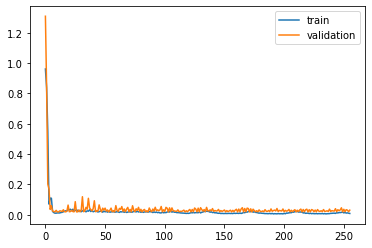

In [15]:

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='validation')
ax1.legend();

In [16]:
test_un = pd.read_csv('datasets/mininet/sdn_train_mininet_unormalized_test.csv', delimiter=",")  
test = pd.read_csv('datasets/mininet/sdn_train_mininet_normalized_test.csv', delimiter=",")     
X_test,Y_test = create_dataset(test, test.delay)

modeling to keras  99.93 %  6.8  seconds


In [17]:
test_un

,temperature,label,delay
0,22752.0000,1.0,140.125256
1,22.7324,1.0,140.125256
2,22752.0000,1.0,140.125256
3,22.7912,1.0,140.125256
4,22.7716,1.0,140.125256
...,...,...,...
1465,19.5768,0.0,420.416429
1466,19.5866,0.0,420.416429
1467,19567.0000,0.0,420.416429
1468,19.5572,0.0,420.416429


# predicting

In [18]:
y_pred = model.predict(X_test)

# unormalizing

In [19]:
y_test_inv, y_pred_inv = unormalizing(test_un, Y_test, y_pred)


In [20]:
y_test_inv

array([[140.1252563 , 140.1252563 , 140.1252563 , ..., 420.41642904,
        420.41642904, 420.41642904]])

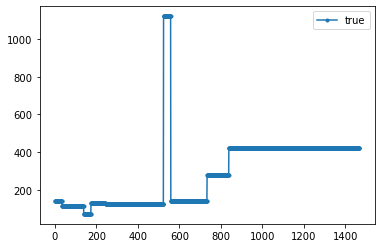

In [21]:
fig2 = plt.figure()
a2 = fig2.add_subplot(1,1,1)
a2.plot(y_test_inv.flatten(), marker='.', label='true')
a2.legend();

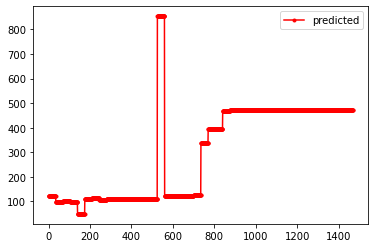

In [22]:
fig3 = plt.figure()
a3 = fig3.add_subplot(1,1,1)
a3.plot(y_pred_inv.flatten(),'r',marker='.', label='predicted')
a3.legend();

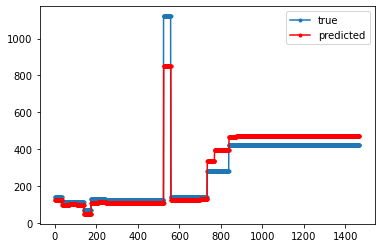

In [23]:
fig4 = plt.figure()
a4 = fig4.add_subplot(1,1,1)

a4.plot(y_test_inv.flatten(), marker='.', label='true')
a4.plot(y_pred_inv.flatten(),'r',marker='.', label='predicted')
a4.legend();

In [24]:
l1 = []
l2 = []
for i in np.arange(y_pred_inv.shape[0]):
    clear_output(wait=True)
    print('progress ',round((i/y_pred_inv.shape[0])*100,2), ('%'))
    if(y_pred_inv[i,0]<=1000):
        l1.append(y_pred_inv[i,0])
    if(y_test_inv[0,i]<=1000):
        l2.append(y_test_inv[0,i])

y_pred_inv2 = np.array(l1)
y_test_inv2 = np.array(l2)

progress  99.93 %


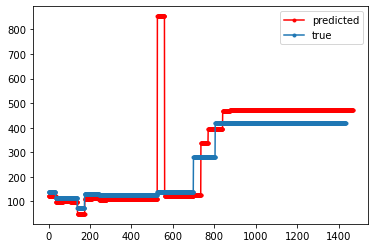

In [25]:
plt.plot(y_pred_inv2.flatten(),'r',marker='.', label='predicted')
plt.plot(y_test_inv2.flatten(), marker='.', label='true')
plt.legend();

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

In [27]:
size = np.min([y_pred_inv2.shape[0],y_test_inv2.shape[0] ])
rmse =  mean_squared_error(y_test_inv2[0:size], y_pred_inv2[0:size], squared=False)
mae =  mean_absolute_error(y_test_inv2[0:size], y_pred_inv2[0:size])
median_mae = median_absolute_error(y_test_inv2[0:size], y_pred_inv2[0:size])


print(rmse)
print(mae)
print(median_mae)

120.9622638637501
54.740776156281825
45.79392862319946


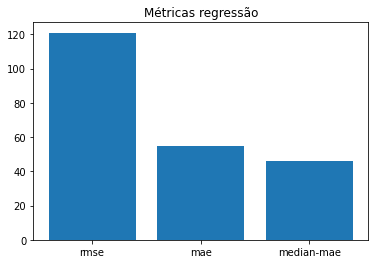

In [28]:
objects = ('rmse', 'mae', 'median-mae')
y_pos = np.arange(3)
performance = [rmse,mae,median_mae]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
plt.title('Métricas regressão')

plt.show()

In [29]:
from sklearn.metrics import explained_variance_score

In [30]:
explained_variance_score(y_test_inv2[0:size], y_pred_inv2[0:size])

0.3224903034115163

In [31]:
y_test_inv2[0:size]

array([140.1252563 , 140.1252563 , 140.1252563 , ..., 420.41642904,
       420.41642904, 420.41642904])